#📌 Extracción

In [1]:
pip install pandas

In [3]:
import requests
import json
import numpy as np

In [6]:
import pandas as pd

#accediedo a la API
df = requests.get('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

#recuperando los resultados
resultado = json.loads(df.text)

##obteniendo vista previa del df
df = pd.DataFrame(resultado)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

## **Normalización de las columnas anidadas**

In [7]:
id_churn = df[['customerID', 'Churn']]
id_churn

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes
...,...,...
7262,9987-LUTYD,No
7263,9992-RRAMN,Yes
7264,9992-UJOEL,No
7265,9993-LHIEB,No


In [8]:
customer = pd.json_normalize(df['customer'])
phone = pd.json_normalize(df['phone'])
internet = pd.json_normalize(df['internet'])
account = pd.json_normalize(df['account'])

#concatenando para crear el df base

telecom_df = pd.concat([id_churn, customer, phone, internet, account], axis=1)
telecom_df.sample(4)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
4377,5996-NRVXR,No,Male,1,Yes,No,40,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),98.15,4116.8
2718,3764-MNMOI,No,Male,0,No,No,46,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.20,908.15
5834,7979-CORPM,Yes,Male,0,No,No,24,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),90.55,2282.55
6236,8580-QVLOC,Yes,Female,1,Yes,Yes,72,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),92.45,6440.25


###**Explorar las columnas y tipos de datos**

In [9]:
#renombrando columnas
telecom_df.rename(columns={
    'customerID': 'id_cliente',
    'gender': 'genero',
    'SeniorCitizen': 'es_ciudadano_senior',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependientes',
    'tenure': 'meses_en_empresa',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'respaldo_online',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'peliculas_streaming',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'factura_electronica',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'cargos_mensuales',
    'Charges.Total': 'cargos_totales',
    'Churn': 'abandono'
}, inplace=True)

telecom_df.head()

,id_cliente,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [10]:
telecom_df.columns

Index(['id_cliente', 'abandono', 'genero', 'es_ciudadano_senior',
       'tiene_pareja', 'tiene_dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'tipo_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago',
       'cargos_mensuales', 'cargos_totales'],
      dtype='object')

In [11]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono                7267 non-null   object 
 2   genero                  7267 non-null   object 
 3   es_ciudadano_senior     7267 non-null   int64  
 4   tiene_pareja            7267 non-null   object 
 5   tiene_dependientes      7267 non-null   object 
 6   meses_en_empresa        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   tipo_internet           7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  proteccion_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  tv_streaming            7267 non-null   

In [12]:
#verificación que no existan datos null
telecom_df.isnull().sum()

,0
id_cliente,0
abandono,0
genero,0
es_ciudadano_senior,0
tiene_pareja,0
tiene_dependientes,0
meses_en_empresa,0
servicio_telefonico,0
lineas_multiples,0
tipo_internet,0


In [13]:
#verificación de valores duplicados
print(telecom_df.duplicated().sum())

0


In [14]:
#verificando errores de formato
for col in ['id_cliente', 'abandono', 'genero', 'es_ciudadano_senior',
       'tiene_pareja', 'tiene_dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'tipo_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago',
       'cargos_mensuales', 'cargos_totales']:
    print(f"Valores únicos para la columna '{col}':")
    print(telecom_df[col].unique())
    print("-" * 20)

Valores únicos para la columna 'id_cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------
Valores únicos para la columna 'abandono':
['No' 'Yes' '']
--------------------
Valores únicos para la columna 'genero':
['Female' 'Male']
--------------------
Valores únicos para la columna 'es_ciudadano_senior':
[0 1]
--------------------
Valores únicos para la columna 'tiene_pareja':
['Yes' 'No']
--------------------
Valores únicos para la columna 'tiene_dependientes':
['Yes' 'No']
--------------------
Valores únicos para la columna 'meses_en_empresa':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------
Valores únicos para la columna 'servicio_telefonico':
['Yes' 'No']
--------------------
Valores únicos para la columna 'lineas_multiples':
['No'

###**Limpieza de los datos en texto**

In [15]:
#limpieza columna id del cliente
telecom_df['id_cliente'] = telecom_df['id_cliente'].str.strip()
telecom_df['id_cliente'].sample(4)

,id_cliente
6569,9036-CSKBW
1,0003-MKNFE
2741,3795-CAWEX
3815,5222-IMUKT


In [16]:
#limpieza de la columna tipo_contrato
telecom_df['tipo_contrato'] = telecom_df['tipo_contrato'].str.lower()
telecom_df['tipo_contrato'] = telecom_df['tipo_contrato'].str.replace(r'\-', ' ', regex=True).str.strip()

In [23]:
telecom_df['tipo_contrato'].sample(4)

,tipo_contrato
7000,month to month
553,month to month
6619,one year
1931,two year


In [24]:
#limpieza de la columna metodo_pago
telecom_df['metodo_pago'] = telecom_df['metodo_pago'].str.lower()
telecom_df['metodo_pago'] = telecom_df['metodo_pago'].str.replace(r'\(|\)', '', regex=True).str.strip()

In [25]:
telecom_df['metodo_pago'].sample(4)

,metodo_pago
4600,electronic check
6770,credit card automatic
1945,credit card automatic
3131,bank transfer automatic


###**Limpieza de los datos númericos**

In [26]:
#Eliminando los espacios del la columna cargos totales
telecom_df['cargos_totales'] = telecom_df['cargos_totales'].replace(' ', np.nan)
#convirtiendo el tipo de dato
telecom_df['cargos_totales'] = pd.to_numeric(telecom_df['cargos_totales'], errors='coerce')
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono                7267 non-null   object 
 2   genero                  7267 non-null   object 
 3   es_ciudadano_senior     7267 non-null   int64  
 4   tiene_pareja            7267 non-null   object 
 5   tiene_dependientes      7267 non-null   object 
 6   meses_en_empresa        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   tipo_internet           7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  proteccion_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  tv_streaming            7267 non-null   

In [27]:
telecom_df['cargos_totales'].isna().sum()

np.int64(11)

In [28]:
# Eliminar registros con cargos_totales faltantes
telecom_df = telecom_df.dropna(subset=['cargos_totales'])

# Verificación rápida
print(f"Número de registros después de limpieza: {len(telecom_df)}")

Número de registros después de limpieza: 7256


In [29]:
col_binario = ['abandono','tiene_pareja', 'tiene_dependientes', 'servicio_telefonico', 'factura_electronica']
telecom_df[col_binario].sample(4)

,abandono,tiene_pareja,tiene_dependientes,servicio_telefonico,factura_electronica
1412,Yes,Yes,No,Yes,Yes
4085,No,Yes,Yes,Yes,No
580,No,No,No,Yes,No
7122,Yes,No,No,Yes,Yes


In [30]:
## Transformar columnas binarias en 'Yes' en 1 y 'No' en 0: la finalidad poder analizar estas columna

telecom_df.loc[:, col_binario] = telecom_df[col_binario].astype(str)
telecom_df.loc[:, col_binario] = telecom_df.loc[:, col_binario].replace({'Yes': 1, 'No': 0, '': np.nan})
telecom_df.loc[:, col_binario] = telecom_df.loc[:, col_binario].fillna(0)
telecom_df[col_binario].sample(4)

/tmp/ipython-input-419485446.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telecom_df.loc[:, col_binario] = telecom_df.loc[:, col_binario].replace({'Yes': 1, 'No': 0, '': np.nan})
/tmp/ipython-input-419485446.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telecom_df.loc[:, col_binario] = telecom_df.loc[:, col_binario].fillna(0)


,abandono,tiene_pareja,tiene_dependientes,servicio_telefonico,factura_electronica
1918,0.0,1,0,1,1
1457,0.0,1,0,1,0
5563,0.0,0,1,1,1
1541,0.0,1,0,1,0


In [31]:
telecom_df[col_binario] = telecom_df[col_binario].astype(np.int64)
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7256 non-null   object 
 1   abandono                7256 non-null   int64  
 2   genero                  7256 non-null   object 
 3   es_ciudadano_senior     7256 non-null   int64  
 4   tiene_pareja            7256 non-null   int64  
 5   tiene_dependientes      7256 non-null   int64  
 6   meses_en_empresa        7256 non-null   int64  
 7   servicio_telefonico     7256 non-null   int64  
 8   lineas_multiples        7256 non-null   object 
 9   tipo_internet           7256 non-null   object 
 10  seguridad_online        7256 non-null   object 
 11  respaldo_online         7256 non-null   object 
 12  proteccion_dispositivo  7256 non-null   object 
 13  soporte_tecnico         7256 non-null   object 
 14  tv_streaming            7256 non-null   objec

#📊 Carga y análisis

###**Análisis Profundo**

In [32]:
#creando la columna cuentas_diarias
telecom_df['cuentas_diarias'] = telecom_df['cargos_mensuales']/30
telecom_df[['cargos_mensuales', 'cuentas_diarias']].sample(4)

,cargos_mensuales,cuentas_diarias
3147,105.50,3.516667
7020,49.25,1.641667
504,93.75,3.125000
979,94.30,3.143333


In [33]:
#análisis descriptivo
telecom_df.describe()

,abandono,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,factura_electronica,cargos_mensuales,cargos_totales,cuentas_diarias
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.158514
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,1.004191
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.181667
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,2.996667
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


###**Distrubución de evasión**

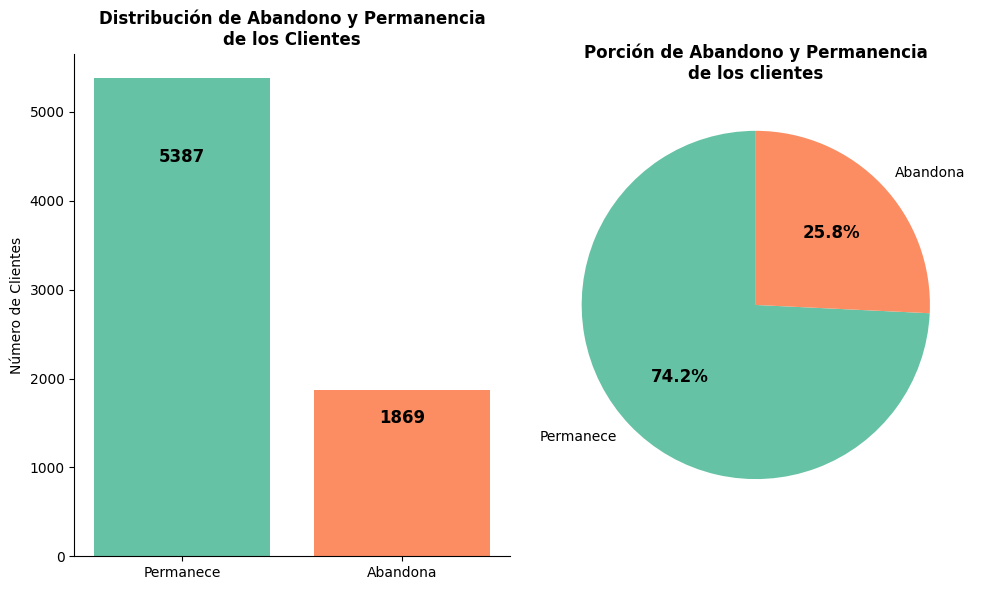

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

abandono_counts = telecom_df["abandono"].value_counts().sort_index()
abandono_props = telecom_df["abandono"].value_counts(normalize=True).sort_index()
labels = ["Permanecen", "Abandonan"]
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
colors = sns.color_palette("Set2")

# Gráfico de barras
bars = axs[0].bar(
    abandono_counts.index.map({0: 'Permanece', 1: 'Abandona'}),
    abandono_counts.values,
    color=colors
)

for ax in axs.flat:
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

axs[0].set_title('Distribución de Abandono y Permanencia\nde los Clientes', fontsize=12, weight='bold', loc='center')
axs[0].set_ylabel('Número de Clientes')

# Texto dentro de las barras
for bar in bars:
    height = bar.get_height()
    axs[0].text(
        bar.get_x() + bar.get_width() / 2,
        height /1.2,
        f'{height:.0f}',
        ha='center',
        va='center',
        fontsize=12,
        fontweight='bold',
        color='black')

axs[0].grid(False)

#gráfico de pastel
def custom_autopct(pct):
    return f'{pct:.1f}%'

wedges, texts, autotexts = axs[1].pie(
    abandono_counts.values,
    labels=abandono_counts.index.map({0: 'Permanece', 1: 'Abandona'}),
    autopct=custom_autopct,
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10})


for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

axs[1].set_title('Porción de Abandono y Permanencia\nde los clientes', fontsize=12, weight='bold', loc='center')

plt.tight_layout()
plt.show()

###**Recuento de evasión por variables categóricas**

In [35]:
# Función auxiliar para ver distribución de abandono por cada categoría
def analizar_evasion_por_categoria(df, columna):
    cruzado = pd.crosstab(df[columna], df['abandono'], normalize='index') * 100
    cruzado.columns = ['% No Abandono', '% Abandono']
    print(f'\nAnálisis para: {columna}')
    print(cruzado)
    return cruzado

# Variables categóricas a analizar
categoricas = ['genero', 'tipo_contrato', 'metodo_pago', 'tipo_internet']

# Aplicar análisis
resultados = {}
for cat in categoricas:
    resultados[cat] = analizar_evasion_por_categoria(telecom_df, cat)


Análisis para: genero
        % No Abandono  % Abandono
genero                           
Female      73.822135   26.177865
Male        74.652494   25.347506

Análisis para: tipo_contrato
                % No Abandono  % Abandono
tipo_contrato                            
month to month      58.676654   41.323346
one year            89.064559   10.935441
two year            97.230237    2.769763

Análisis para: metodo_pago
                         % No Abandono  % Abandono
metodo_pago                                       
bank transfer automatic      83.742911   16.257089
credit card automatic        85.194639   14.805361
electronic check             56.196319   43.803681
mailed check                 81.412191   18.587809

Análisis para: tipo_internet
               % No Abandono  % Abandono
tipo_internet                           
DSL                81.514297   18.485703
Fiber optic        59.443402   40.556598
No                 92.825397    7.174603


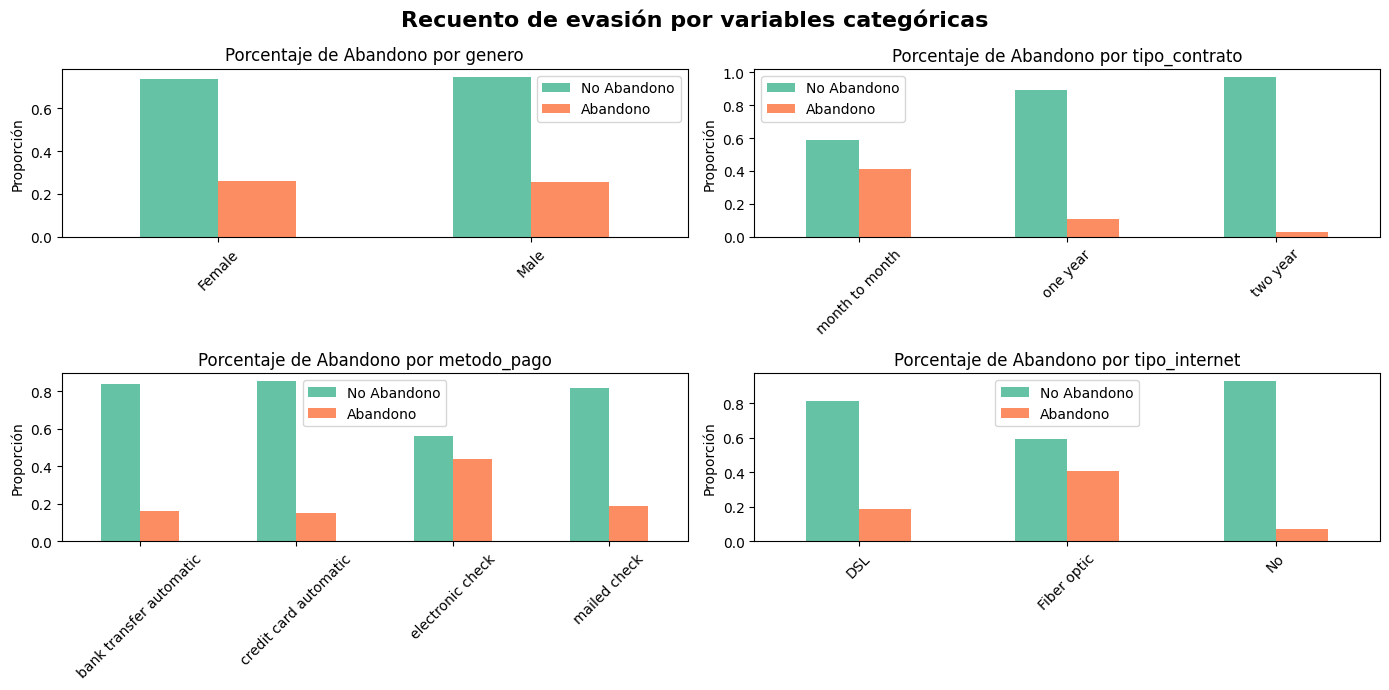

In [36]:
# Configuración de subplots: 2 columnas por fila
fig, axes = plt.subplots(nrows=(len(categoricas) + 1) // 2, ncols=2, figsize=(14, 7))
axes = axes.flatten()
colors = sns.color_palette("Set2")

# Crear cada gráfico en su subplot
for i, cat in enumerate(categoricas):
    cruzado = pd.crosstab(telecom_df[cat], telecom_df['abandono'], normalize='index')
    cruzado.plot(kind='bar', ax=axes[i], color=colors)

    axes[i].set_title(f'Porcentaje de Abandono por {cat}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Proporción')
    axes[i].legend(['No Abandono', 'Abandono'])
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Recuento de evasión por variables categóricas', fontsize=16, weight='bold', ha='center')

plt.tight_layout()
plt.show()

###**Análisis de evasión en columnas binarias**

In [37]:
binarias = ['es_ciudadano_senior', 'tiene_pareja', 'tiene_dependientes', 'servicio_telefonico', 'factura_electronica']
def analizar_evasion_binarias(df, columna):
    # Mapeo opcional para mejor legibilidad (0 = No, 1 = Sí)
    df_temp = df.copy()
    df_temp[columna] = df_temp[columna].map({1: 'Sí', 0: 'No'})

    cruzado = pd.crosstab(df_temp[columna], df_temp['abandono'], normalize='index') * 100
    cruzado.columns = ['% No Abandono', '% Abandono']

    print(f'\nAnálisis para: {columna}')
    print(cruzado)
    return cruzado

# Resultados por columna binaria
resultados_binarios = {}
for col in binarias:
    resultados_binarios[col] = analizar_evasion_binarias(telecom_df, col)


Análisis para: es_ciudadano_senior
                     % No Abandono  % Abandono
es_ciudadano_senior                           
No                       77.066184   22.933816
Sí                       59.729272   40.270728

Análisis para: tiene_pareja
              % No Abandono  % Abandono
tiene_pareja                           
No                67.974380   32.025620
Sí                80.934739   19.065261

Análisis para: tiene_dependientes
                    % No Abandono  % Abandono
tiene_dependientes                           
No                      69.661817   30.338183
Sí                      84.976959   15.023041

Análisis para: servicio_telefonico
                     % No Abandono  % Abandono
servicio_telefonico                           
No                       75.886525   24.113475
Sí                       74.065028   25.934972

Análisis para: factura_electronica
                     % No Abandono  % Abandono
factura_electronica                           
No            

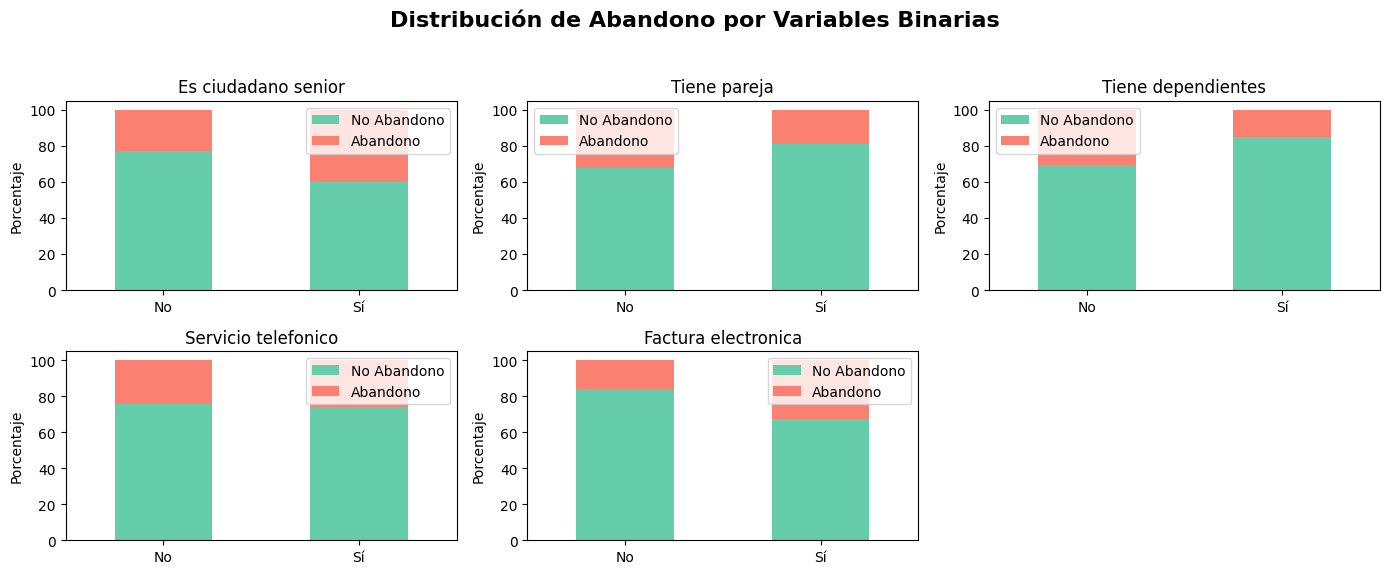

In [38]:
# Crear figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 6))
axes = axes.flatten()

for idx, col in enumerate(binarias):
    df_temp = telecom_df.copy()
    df_temp[col] = df_temp[col].map({1: 'Sí', 0: 'No'})

    cruzado = pd.crosstab(df_temp[col], df_temp['abandono'], normalize='index') * 100
    cruzado.columns = ['No Abandono', 'Abandono']

    cruzado.plot(kind='bar', stacked=True, color=['mediumaquamarine', 'salmon'], ax=axes[idx])
    axes[idx].set_title(f'{col.replace("_", " ").capitalize()}')
    axes[idx].set_ylabel('Porcentaje')
    axes[idx].set_xlabel('')
    axes[idx].legend(loc='best')
    axes[idx].tick_params(axis='x', rotation=0)

# Eliminar subplot vacío
if len(binarias) < len(axes):
    for j in range(len(binarias), len(axes)):
        fig.delaxes(axes[j])

plt.suptitle('Distribución de Abandono por Variables Binarias', fontsize=16, weight='bold', ha='center')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

###**Conteo de evasión por variables numéricas**

In [39]:
numericas = ['meses_en_empresa', 'cargos_mensuales', 'cargos_totales', 'cuentas_diarias']
def analizar_evasion_numericas(df, columnas, bins=4):

    resultados = {}

    for col in columnas:
        # Crear intervalos (bins)
        df[f'{col}_bin'] = pd.qcut(df[col], q=bins, duplicates='drop')

        # Tabla cruzada
        cruzado = pd.crosstab(df[f'{col}_bin'], df['abandono'], normalize='index') * 100
        cruzado.columns = ['% No Abandono', '% Abandono']

        print(f'\nAnálisis por rangos para: {col}')
        print(cruzado)

        resultados[col] = cruzado

    return resultados


resultados_numericas = analizar_evasion_numericas(telecom_df, numericas, bins=5)


Análisis por rangos para: meses_en_empresa
                      % No Abandono  % Abandono
meses_en_empresa_bin                           
(0.999, 6.0]              48.590164   51.409836
(6.0, 20.0]               67.456446   32.543554
(20.0, 40.0]              78.305785   21.694215
(40.0, 60.0]              84.924623   15.075377
(60.0, 72.0]              93.590627    6.409373

Análisis por rangos para: cargos_mensuales
                      % No Abandono  % Abandono
cargos_mensuales_bin                           
(18.249, 25.05]           91.114149    8.885851
(25.05, 58.7]             75.763889   24.236111
(58.7, 79.1]              71.114168   28.885832
(79.1, 94.3]              64.872326   35.127674
(94.3, 118.75]            68.206897   31.793103

Análisis por rangos para: cargos_totales
                    % No Abandono  % Abandono
cargos_totales_bin                           
(18.799, 266.6]         55.509642   44.490358
(266.6, 939.7]          72.019297   27.980703
(939.7, 2033.8

In [40]:
import plotly.express as px


def graficar_barras_abandono_interactivo(df, columnas, bins=10):
    datos_plot = []

    for col in columnas:
        # Crear bins para la columna numérica
        df_temp = df.copy()
        df_temp[f'{col}_bin'] = pd.qcut(df[col], q=bins, duplicates='drop')

        # Convertir bin a string para evitar error al exportar
        df_temp[f'{col}_bin'] = df_temp[f'{col}_bin'].astype(str)

        # Calcular % de abandono agrupado por bin
        resumen = df_temp.groupby(f'{col}_bin', observed=True)['abandono'].mean().reset_index()
        resumen['abandono'] = resumen['abandono'] * 100
        resumen['variable'] = col

        resumen = resumen.rename(columns={f'{col}_bin': 'rango', 'abandono': 'porcentaje_abandono'})
        datos_plot.append(resumen)

    datos_todos = pd.concat(datos_plot)

    # Gráfico interactivo de barras agrupadas
    plotly_fig = px.bar(
        datos_todos,
        x='rango',
        y='porcentaje_abandono',
        color='variable',
        barmode='group',
        title='Porcentaje de abandono según variables numéricas',
        labels={'rango': 'Rango de valor', 'porcentaje_abandono': '% de abandono', 'variable': 'Variable'}
    )

    plotly_fig.update_layout(
        width=900,
        height=500,
        xaxis_tickangle=-45,
        template='plotly_white',
        font=dict(family='Arial', size=14, color='black')
    )

    plotly_fig.show()
    return plotly_fig

# Llamar la función
numericas = ['meses_en_empresa', 'cargos_mensuales', 'cargos_totales', 'cuentas_diarias']
plotly_figure_for_saving = graficar_barras_abandono_interactivo(telecom_df, numericas)

# Guardar como archivo
output_path = '/content/telecomx_evasion_clientes.html'
plotly_figure_for_saving.write_html(output_path)


###**Mapa de calor de correlaciones (para variables numéricas)**

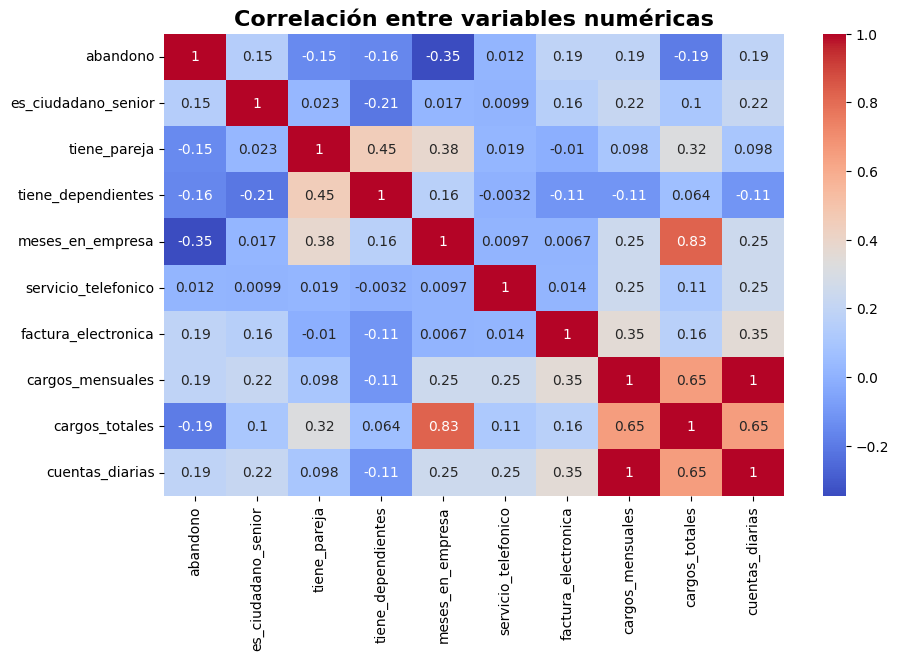

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(telecom_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlación entre variables numéricas", fontsize=16, weight='bold', ha='center')
plt.show()

#📄Informe final

##**Introducción**

Este análisis tiene como propósito principal entender qué factores contribuyen a la pérdida de clientes en una empresa de telecomunicaciones. El abandono de clientes representa una amenaza para la estabilidad del negocio, ya que suele ser más costoso captar nuevos usuarios que conservar a los actuales.

A través del estudio de datos históricos, se pretende identificar tendencias y comportamientos que permitan anticipar la desvinculación de clientes y aplicar estrategias que promuevan su permanencia.

##**Limpieza y Tratamiento de Datos**

Para asegurar la calidad de los datos utilizados en el análisis, se realizaron las siguientes tareas de preparación:

* Se importaron los datos desde una API provista por Telecom X, en formato JSON.

* Se ajustaron los nombres de las columnas eliminando espacios para facilitar su manipulación.

* Se corrigieron tipos de datos, convirtiendo columnas a formato numérico cuando fue necesario.

* Se eliminaron filas con valores nulos, especialmente aquellas sin información clave como el ID del cliente.

* Se identificaron y removieron registros duplicados para evitar sesgos.

* Se revisaron valores únicos en columnas categóricas, estandarizando respuestas en campos como "Churn" y "Género" para lograr consistencia.

##**Análisis Exploratorio de Datos**

A continuación, se realizó una exploración estadística y visual para detectar patrones en los datos relacionados con el abandono de clientes:

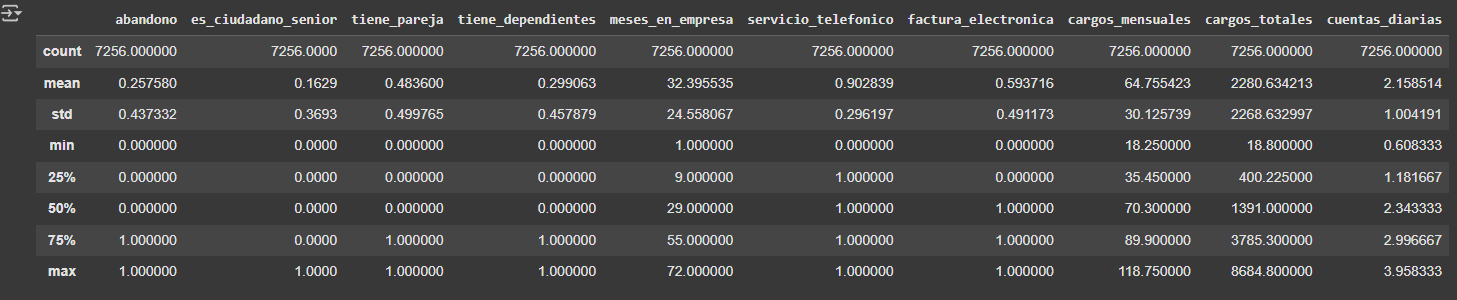

##**Distribución general de la evasión**

Se identificó que cerca del 25.8% de los clientes han cancelado el servicio.

Gráfico: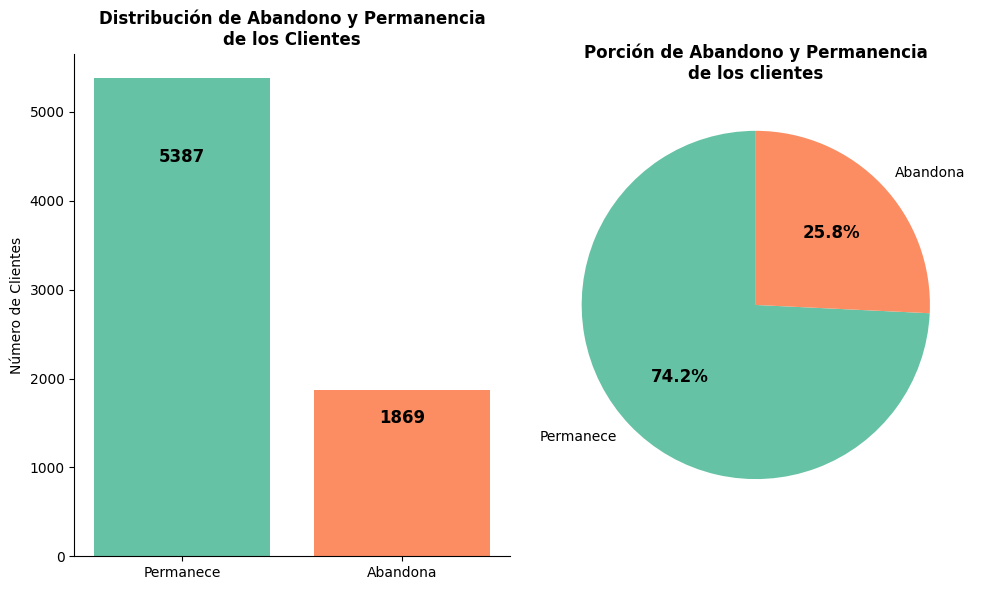

##**Análisis por variables categóricas**

Tipo de Contrato: Los clientes con contrato mensual presentan una mayor tasa de cancelación.

Método de Pago: Aquellos que utilizan tarjeta electrónica como medio de pago tienen mayor probabilidad de abandono.

Género: No se observaron diferencias significativas en la evasión entre hombres y mujeres.

Gráficos por categoría:

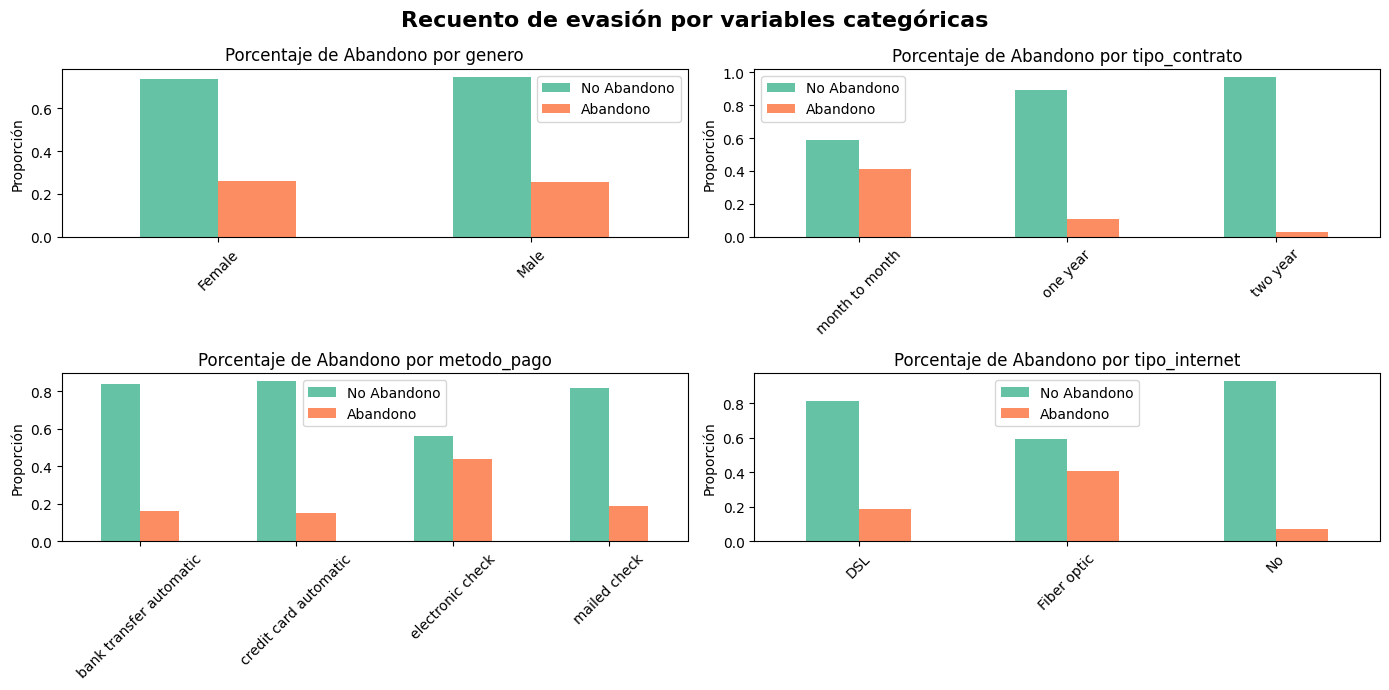

##**Análisis por Variables Binarias**

Se exploró la relación entre variables binarias y la cancelación del servicio:

* Ciudadanos senior: muestran una mayor tendencia a abandonar.

* Clientes con pareja: menor tasa de evasión.

* Clientes con dependientes: también tienden a permanecer más.

* Servicio telefónico: sin impacto notable.

* Factura electrónica: quienes la reciben presentan una mayor tasa de abandono.

Gráfico:

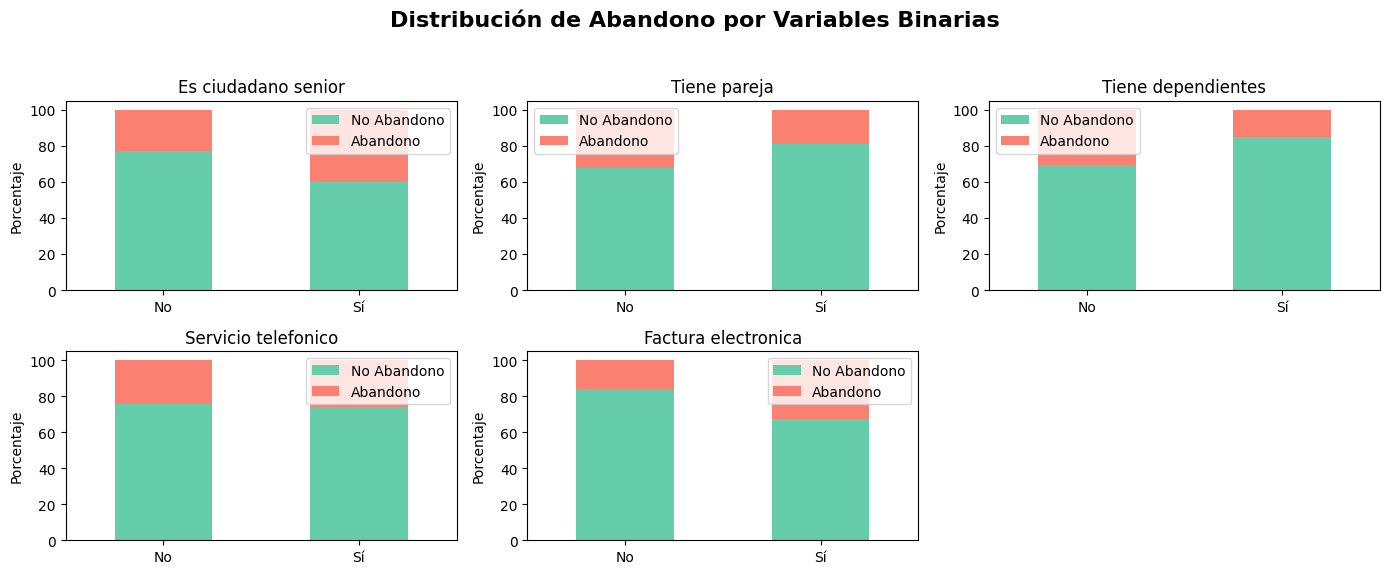

##**Análisis por variables numéricas**

* Antigüedad del cliente (meses): los clientes más nuevos tienden a cancelar, mientras que aquellos con más tiempo suelen permanecer.

* Gasto total: aunque algunos clientes con alto gasto también cancelan, en general se observa una relación entre gasto elevado y fidelidad.

Gráficos por variable numérica:

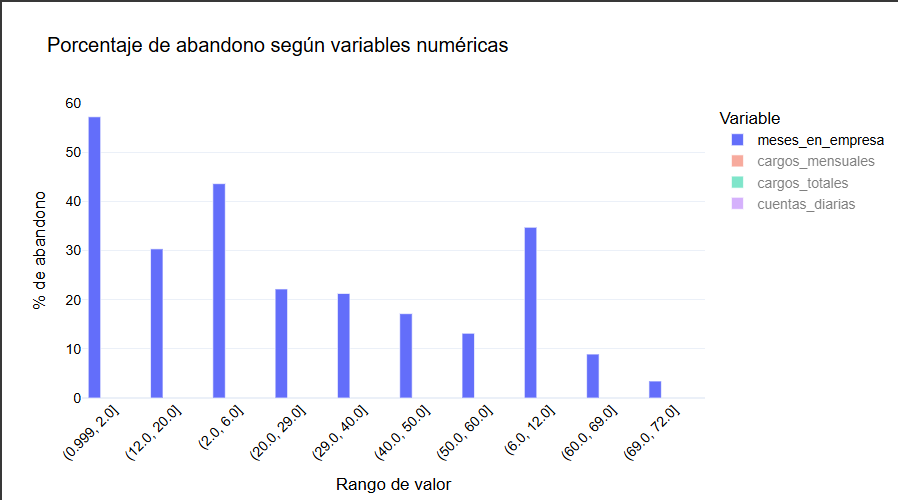


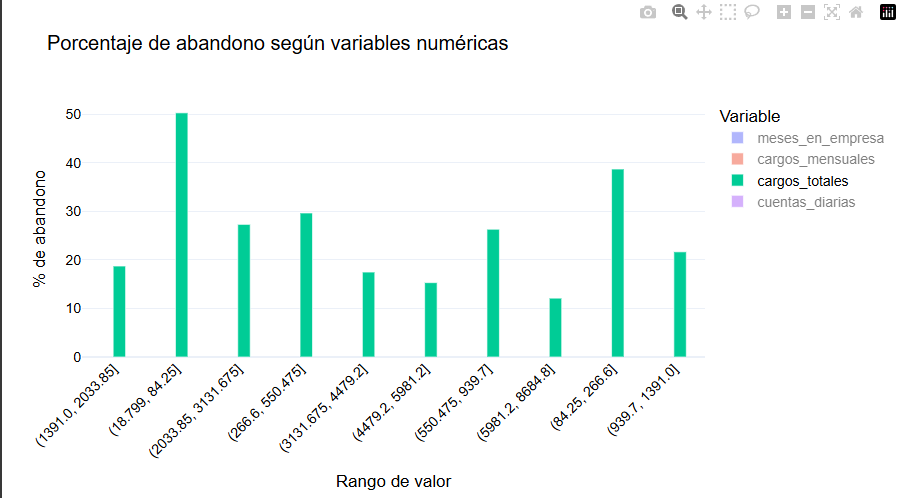

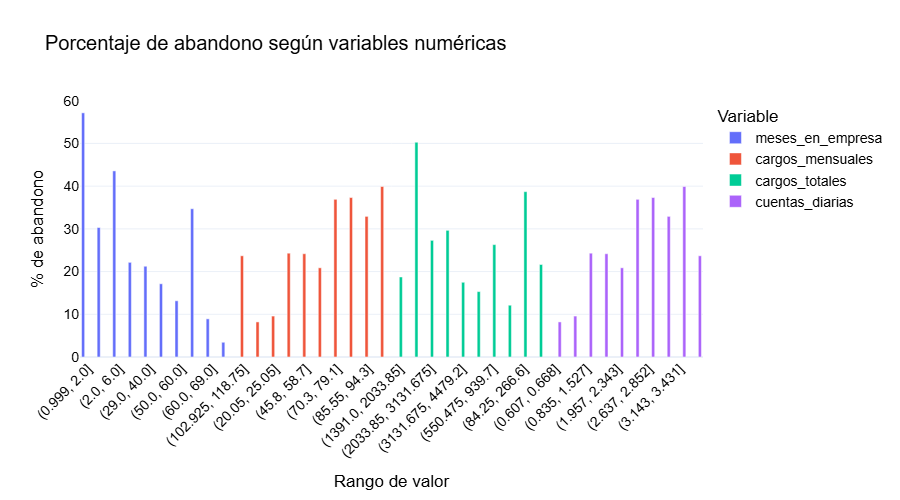

##**Mapa de calor de correlaciones**

Se generó un heatmap para detectar relaciones entre variables numéricas. Algunos hallazgos relevantes:

* Antigüedad y abandono: correlación negativa (-0.35). A mayor tiempo en la empresa, menor evasión.

* Cargos mensuales y abandono: correlación positiva (0.19). Cargos más altos podrían llevar al abandono por percepción de alto costo.

* Factura electrónica y abandono: correlación positiva (0.19), posible indicador de clientes más exigentes o digitalizados.

* Cargos totales y abandono: correlación negativa (-0.19), lo que sugiere que quienes más gastaron tienden a quedarse.

* Ciudadanos senior y abandono: correlación positiva (0.15), tal vez influido por menor uso de servicios o barreras tecnológicas.

###**Correlaciones destacadas entre otras variables:**

* Antigüedad y cargos totales: alta correlación (0.83), esperable por acumulación de facturación.

* Cargos mensuales, cuentas diarias y factura electrónica: correlaciones moderadas entre sí (0.35–0.65), lo que indica un patrón digital más marcado en ciertos usuarios.

Gráfico:

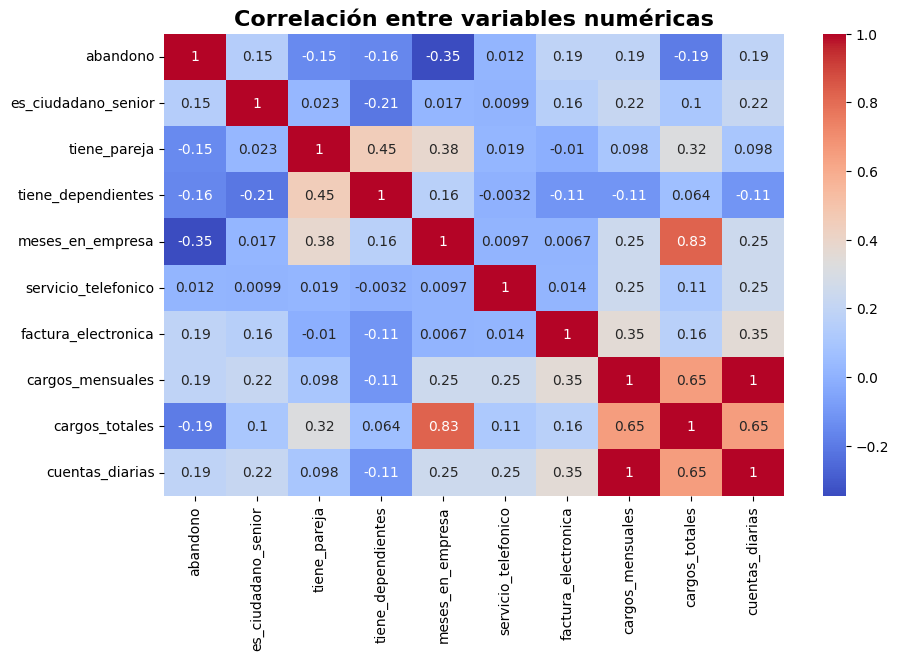

##**Síntesis del Análisis y Hallazgos Relevantes**

Del estudio realizado emergen diversos patrones que permiten comprender mejor el comportamiento de los clientes que abandonan el servicio. En primer lugar, los contratos mensuales muestran una mayor vulnerabilidad al abandono, posiblemente debido a su menor nivel de compromiso a largo plazo. También se observó una mayor evasión en aquellos clientes que utilizan métodos de pago electrónicos, lo que podría relacionarse con un perfil más exigente o digitalizado.

El tiempo de permanencia es un factor determinante: los nuevos clientes presentan tasas más altas de cancelación, mientras que aquellos con mayor antigüedad tienden a mantenerse. Además, se identificaron diferencias en función de características personales; por ejemplo, los ciudadanos mayores o que no conviven con otros (pareja o dependientes) tienen mayor probabilidad de abandonar.

Por otro lado, aunque los clientes con mayor gasto mensual tienden a cancelar más, aquellos con un gasto total acumulado elevado suelen ser más leales. Esto sugiere que el valor percibido del servicio y la experiencia general son claves para la retención, más allá del monto facturado.

##**Líneas de Acción Estratégica**

A partir de los hallazgos, se proponen varias acciones para mitigar la evasión de clientes y fortalecer su fidelización:

* Incentivar la permanencia: Promover contratos a largo plazo mediante beneficios exclusivos o descuentos progresivos que premien la continuidad.

* Fortalecer la experiencia inicial: Enfocar los esfuerzos en los primeros meses de relación con el cliente, brindando atención proactiva, acompañamiento personalizado y soluciones rápidas.

* Atención especializada a adultos mayores: Implementar asistencia técnica accesible y personalizada para reducir la evasión por barreras tecnológicas o falta de uso.

* Aumentar el engagement con servicios complementarios: Ofrecer productos o beneficios adicionales que refuercen el vínculo emocional y funcional con la marca.

* Detección temprana de clientes en riesgo: Utilizar modelos predictivos para identificar perfiles con alta probabilidad de abandono y lanzar campañas preventivas focalizadas.

* Reforzar la percepción de valor: Revaluar la estrategia de precios, mejorar la comunicación de beneficios y asegurar que el servicio esté alineado con las expectativas del cliente, especialmente en segmentos con alto gasto.

* Optimizar la experiencia digital: Investigar y ajustar los canales digitales, especialmente para usuarios de factura electrónica, con el fin de eliminar fricciones y aumentar la satisfacción.